# **Exploratory Analysis on Lunch Delivery Time Series Data**

## **1. Import data**


- num_matrix is number of orders: col=time periods, row=locations.

- quan_matrix is total quantity ordered.

- distance_matrix is the distance between two locations.

- time.csv records the date/time of each period


In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
data_dir = "/home/angps/Documents/Thesis/Data/"


**Importing Demand for each location and time period**

In [2]:
loc_time_demand_df = pd.read_csv(data_dir + "num_matrix.txt", header=None, names = list(range(1,205)), delim_whitespace=True)

In [3]:
loc_time_demand_df.shape

(839, 204)

In [4]:
loc_time_demand_df.head()

,1,2,3,4,5,6,7,8,9,10,...,195,196,197,198,199,200,201,202,203,204
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Import time-date mapping df**

In [5]:
time_date_df = pd.read_csv(data_dir + "time.csv", index_col=0)
time_date_df['date'] = pd.to_datetime(time_date_df['date'])

In [6]:
time_date_df.head()

,date,weekday
1,2015-08-10,Monday
2,2015-08-10,Monday
3,2015-08-10,Monday
4,2015-08-10,Monday
5,2015-08-10,Monday


In [7]:
time_date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 204
Data columns (total 2 columns):
date       204 non-null datetime64[ns]
weekday    204 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 4.8+ KB


## **2. Exploratory Analysis on Demand Data**

### **2.1 Mean of each day**

Text(0.5, 1.0, 'Mean Demand of all locations across days')

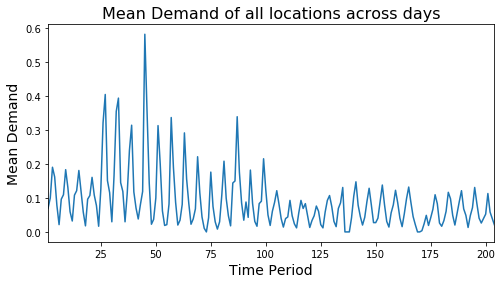

In [8]:
mean_demand = loc_time_demand_df.mean()
mean_demand.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of all locations across days", fontsize = 16)

### **2.2 Percentage of locations with low counts of demand**

In [9]:
num_of_non_zeros = (loc_time_demand_df != 0).sum(axis=1)

(array([689.,  70.,  33.,  17.,  11.,   6.,   5.,   3.,   1.,   4.]),
 array([  0. ,  14.8,  29.6,  44.4,  59.2,  74. ,  88.8, 103.6, 118.4,
        133.2, 148. ]),
 <a list of 10 Patch objects>)

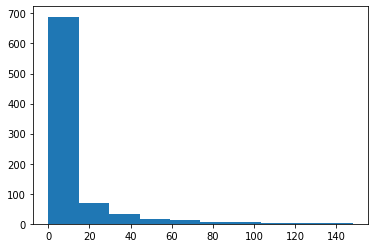

In [10]:
plt.hist(num_of_non_zeros)

In [11]:
num_of_non_zeros.describe(percentiles=[0.95])

count    839.000000
mean       9.909416
std       19.564321
min        0.000000
50%        2.000000
95%       48.200000
max      148.000000
dtype: float64

We can see that there are alot of locations with very low non-zero demands (<10) in total for 2 months. To construct a baseline model, I would just use locations with **at least 50 counts** of data over 2 months

## **3. Baseline Model**

### **3.1 Subsetting data with at least 50 counts**

In [28]:
min_count = 50
df_atleast_50_cts = loc_time_demand_df[(loc_time_demand_df > 0).sum(axis=1) >= min_count].reset_index(drop=True)

In [29]:
df_atleast_50_cts.head()

,1,2,3,4,5,6,7,8,9,10,...,195,196,197,198,199,200,201,202,203,204
0,0,1,5,3,1,1,1,4,6,2,...,7,0,1,1,2,1,2,1,1,1
1,1,2,3,0,3,0,1,2,4,2,...,0,0,2,0,0,0,0,0,1,0
2,0,0,2,5,1,0,0,4,4,0,...,2,1,0,0,1,0,1,1,0,0
3,0,2,7,5,4,0,4,4,4,2,...,2,0,0,1,3,0,5,1,0,0
4,0,0,1,6,0,0,1,3,3,1,...,0,1,0,0,1,0,3,0,0,0


In [30]:
df_atleast_50_cts.shape

(42, 204)

### **3.2 Mean Demand of locations (>= 50 non-zero counts) across days**

Text(0.5, 1.0, 'Mean Demand of locations (>= 50 non-zero counts) across days')

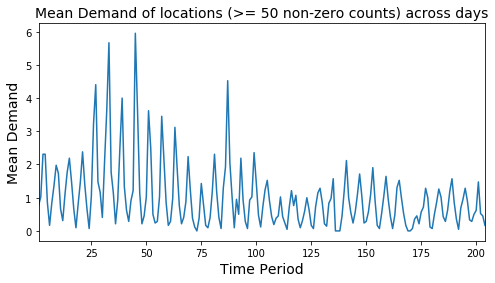

In [31]:
mean_demand = df_atleast_50_cts.mean()
mean_demand.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of locations (>= 50 non-zero counts) across days", fontsize = 14)

### **3.3 Mean Demand of sample individual location (>= 50 non-zero counts) across days**

Text(0.5, 1.0, 'Mean Demand of locations (>= 50 non-zero counts) across days')

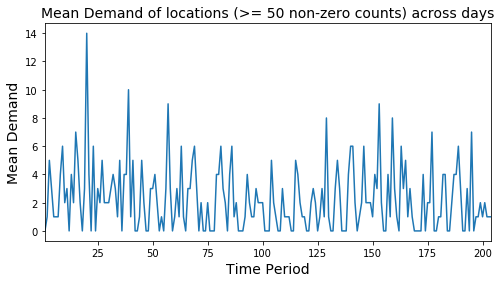

In [42]:
mean_demand = df_atleast_50_cts.iloc[0,:]
mean_demand.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of locations (>= 50 non-zero counts) across days", fontsize = 14)

Text(0.5, 1.0, 'Mean Demand of locations (>= 50 non-zero counts) across days')

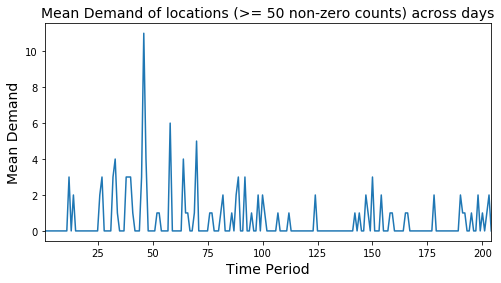

In [43]:
mean_demand = df_atleast_50_cts.iloc[24,:]
mean_demand.plot(figsize=(8,4))
plt.xlabel("Time Period", fontsize = 14)
plt.ylabel("Mean Demand", fontsize = 14)
plt.title("Mean Demand of locations (>= 50 non-zero counts) across days", fontsize = 14)